In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msg

In [11]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [12]:
df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [13]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [14]:
df1.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [17]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [19]:
df1.team1.unique

<bound method Series.unique of 0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
4      Royal Challengers Bangalore
                  ...             
751          Kolkata Knight Riders
752            Chennai Super Kings
753            Sunrisers Hyderabad
754                 Delhi Capitals
755                 Mumbai Indians
Name: team1, Length: 756, dtype: object>

In [16]:
#### Extract csk and srh table

In [20]:
main_df = df1[((df1['team1'] == 'Sunrisers Hyderabad') & (df1['team2'] == 'Chennai Super Kings')) | ((df1['team1'] == 'Chennai Super Kings') & (df1['team2'] == 'Sunrisers Hyderabad'))]

In [21]:
main_df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
413,414,2013,Chennai,2013-04-25,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,MS Dhoni,"MA Chidambaram Stadium, Chepauk",Aleem Dar,S Das,NaN
434,435,2013,Hyderabad,2013-05-08,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,77,0,SK Raina,"Rajiv Gandhi International Stadium, Uppal",S Das,NJ Llong,NaN
473,474,2014,Sharjah,2014-04-27,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,DR Smith,Sharjah Cricket Stadium,AK Chaudhary,VA Kulkarni,NaN
506,507,2014,Ranchi,2014-05-22,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,6,DA Warner,JSCA International Stadium Complex,BNJ Oxenford,C Shamshuddin,NaN
520,521,2015,Chennai,2015-04-11,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
550,551,2015,Hyderabad,2015-05-02,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Sunrisers Hyderabad,22,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,K Srinivasan,NaN
655,7913,2018,Hyderabad,22/04/18,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,4,0,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal",Anil Chaudhary,Vineet Kulkarni,Nigel Llong
681,7939,2018,Pune,13/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium,Marais Erasmus,Yeshwant Barde,Anil Dandekar
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


# Ques 1 : Who will win ?

In [22]:
main_df.winner.value_counts()

Chennai Super Kings    9
Sunrisers Hyderabad    3
Name: winner, dtype: int64

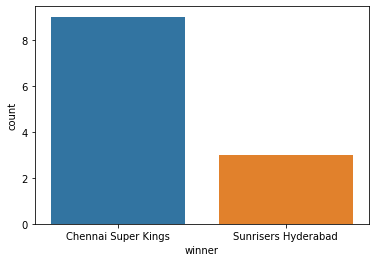

In [23]:
sb.countplot(main_df['winner'])

### Seeing the past record data , head 2 head
### Csk - 9 wins
### Srh - 3 wins

### Since , In dubai international stadium  , bowling is taken first and have won most matches ! it depends who win the toss ! 
### If CSK win the toss , CSK might win , else SRH 

### But looking at records and CSK willing to come up strong ! I guess CSK will Win !

# 1 -Ans : CSK

In [28]:
#############################################################################################################

# Ques 2 - Wides ?

In [29]:
main_df_team = df[(df['batting_team'] == 'Sunrisers Hyderabad') | (df['batting_team'] == 'Chennai Super Kings')]

In [30]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [31]:
main_df_team['wide_runs'].sum()

1172

count    32670.000000
mean         0.035874
std          0.246929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: wide_runs, dtype: float64


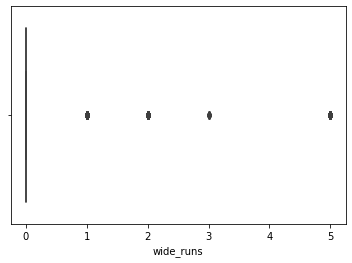

In [33]:
sb.boxplot(main_df_team['wide_runs'])
print(main_df_team['wide_runs'].describe())

In [40]:
max_match = main_df_team['match_id'].max()

In [41]:
max_match

11415

In [42]:
11415 / 240

47.5625

In [43]:
sum_of_wides = 1172
match = 48
avg_wide = 1172 / match

In [44]:
avg_wide

24.416666666666668

In [49]:
### Avg wides permatch acc to stats are 4 including both !

# 2-Ans : opt2 : 3-5

In [48]:
#######################################################################################################################

In [71]:
warner = main_df_team[main_df_team['batsman'] == 'DA Warner']
warner

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176247,11339,1,Sunrisers Hyderabad,Kings XI Punjab,15,3,DA Warner,MK Pandey,A Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
176250,11339,1,Sunrisers Hyderabad,Kings XI Punjab,15,6,DA Warner,MK Pandey,A Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
176251,11339,1,Sunrisers Hyderabad,Kings XI Punjab,16,1,DA Warner,MK Pandey,R Ashwin,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176252,11339,1,Sunrisers Hyderabad,Kings XI Punjab,16,2,DA Warner,MK Pandey,R Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [72]:
warner['total_runs'].sum()

3461

In [73]:
2291 / 240

9.545833333333333

In [75]:
3461 / 100

34.61

In [76]:
### looking at this year data , out of 7 matches - runs scored 275
avg = 275 / 7
avg

39.285714285714285

In [77]:
### Since , he is the opener for SRH , I guess he will score good as last match they have won!

# 3.Ans - opt3 : 26-39

In [78]:
#######################################################################################################################

# Ques 4 : Wickets lost for CSK

In [81]:
main_df_team['player_dismissed'].count()

1453

In [82]:
len(main_df_team)

32670

In [83]:
32670 / 240

136.125

In [84]:
1453 / 137

10.605839416058394

In [85]:
### since csk are not in good form and also knowing that avg fall in ipl is more than 3

In [86]:
# Hence ans is 3-5

# 4.Ans - opt 2 : 3-5

In [87]:
main_df_team.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [88]:
runs = main_df_team[['wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs',]]
runs

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,4,0,4
3,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...
179073,0,0,0,0,0,1,0,1
179074,0,0,0,0,0,2,0,2
179075,0,0,0,0,0,1,0,1
179076,0,0,0,0,0,2,0,2


In [89]:
runs['total_runs'].sum()

43477

In [90]:
179077 / 240

746.1541666666667

In [91]:
43477 / 747

58.20214190093708

In [92]:
## the avg first innings scored is 144 and 122 for 2nd , but this is for INDIA Stadium
## Dubai Stadium is meant good for batting , so it will be in the range of 321 - 340

In [94]:
### And hence both the team are strong and it is a good pitch for batting 
### Ans is opt 2 : 321-340

# 5.Ans : Opt 2 : 321-340